In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')

df_run = pd.read_pickle('df_run.p')

df_run.head()

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone
date,,,,,,,,,,,
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,NaN,Run,21.9,"(55.95, -3.19)",6.437492,32.333333,NaN
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,148.3,Run,20.5,"(55.95, -3.19)",6.750371,33.600000,2.0
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,160.1,Run,20.4,"(55.95, -3.19)",6.444960,18.616667,3.0
2017-06-28 19:55:15,1163118846,1,414.8,2.942,NaN,Run,0.0,"(55.95, -3.19)",5.665080,2.350000,NaN
2017-06-28 19:30:59,1163118747,1,2732.6,2.598,NaN,Run,75.0,"(55.96, -3.16)",6.415191,17.533333,NaN


In [2]:
df_run['zone'].notnull().sum()

39

In [3]:
df_run['zone'].isnull().sum()

90

Problem: High proportion of Null for Heart Rate

Solution: Use ML to predict zone

In [4]:
# Seperate data
zone_train = df_run[df_run['zone'].notnull()]
zone_test = df_run[df_run['zone'].isnull()]
zone_train.head()

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone
date,,,,,,,,,,,
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,148.3,Run,20.5,"(55.95, -3.19)",6.750371,33.600000,2.0
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,160.1,Run,20.4,"(55.95, -3.19)",6.444960,18.616667,3.0
2017-06-26 17:58:31,1159027781,1,5041.2,2.778,163.3,Run,22.3,"(55.95, -3.19)",5.999520,30.250000,4.0
2017-06-19 17:33:55,1159027395,1,4171.9,2.741,152.0,Run,17.8,"(55.95, -3.19)",6.080506,25.366667,2.0
2017-06-13 17:17:31,1138444604,1,3025.8,2.921,161.2,Run,19.9,"(55.95, -3.19)",5.705809,17.266667,3.0


In [5]:
# Drop uneccessary cols
# pace correlates with distance and duration, so drop
col_drop = ['id', 'athlete_count', 'avg_speed', 'type', 'latlng', 'avg_hr', 'pace']

zone_train = zone_train.drop(col_drop, axis=1)
zone_test = zone_test.drop(col_drop, axis=1)
zone_train.head()

,distance,elevation_gain,duration,zone
date,,,,
2017-07-05 17:50:32,4977.9,20.5,33.600000,2.0
2017-07-01 16:30:48,2889.1,20.4,18.616667,3.0
2017-06-26 17:58:31,5041.2,22.3,30.250000,4.0
2017-06-19 17:33:55,4171.9,17.8,25.366667,2.0
2017-06-13 17:17:31,3025.8,19.9,17.266667,3.0


In [6]:
# Check correlation

zone_train.corr()

,distance,elevation_gain,duration,zone
distance,1.000000,0.567880,0.994291,-0.050964
elevation_gain,0.567880,1.000000,0.554582,0.370300
duration,0.994291,0.554582,1.000000,-0.053661
zone,-0.050964,0.370300,-0.053661,1.000000


In [8]:
zone_train.shape
# Data size too small

(39, 4)

<IPython.core.display.Javascript object>


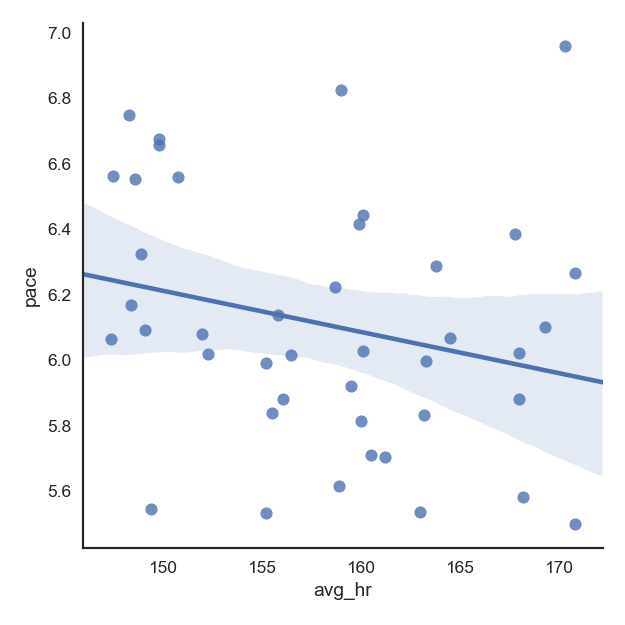

In [36]:
sns.lmplot(x='avg_hr', y='pace', data=df_run)

In [37]:
# Drop outliers


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [46]:
X = zone_train.drop('zone', axis=1)
y = zone_train['zone']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.10,
                                                    random_state=1)

### Using Linear Regression Model

In [47]:
model_lr = LinearRegression().fit(X_train, y_train)
print('Training set accuracy: {:.2f}:'.format(model_lr.score(X_train, y_train)))
print('Test set accuracy: {:.2f}:'.format(model_lr.score(X_test, y_test)))

Training set accuracy: 0.20:
Test set accuracy: 0.35:


In [48]:
model_forest = RandomForestRegressor(n_estimators=6).fit(X_train, y_train)
print('Training set accuracy: {:.2f}:'.format(model_forest.score(X_train, y_train)))
print('Test set accuracy: {:.2f}:'.format(model_forest.score(X_test, y_test)))

Training set accuracy: 0.73:
Test set accuracy: -0.00:


In [49]:
y_test

date
2017-06-26 17:58:31    4.0
2016-10-31 17:11:02    2.0
2017-06-19 17:33:55    2.0
2016-11-26 15:46:12    5.0
Name: zone, dtype: float64

In [50]:
X_test

,distance,elevation_gain,duration
date,,,
2017-06-26 17:58:31,5041.2,22.3,30.250000
2016-10-31 17:11:02,3359.6,30.2,20.466667
2017-06-19 17:33:55,4171.9,17.8,25.366667
2016-11-26 15:46:12,8696.3,160.1,54.483333


In [51]:
X_test['predicted zone'] = model_forest.predict(X_test)
X_test

C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,distance,elevation_gain,duration,predicted zone
date,,,,
2017-06-26 17:58:31,5041.2,22.3,30.250000,3.333333
2016-10-31 17:11:02,3359.6,30.2,20.466667,3.666667
2017-06-19 17:33:55,4171.9,17.8,25.366667,3.333333
2016-11-26 15:46:12,8696.3,160.1,54.483333,3.666667


In [ ]:
# Time to get a new HRM